# Poissson Hidden Markov Models

In [1]:
# Set your working directory
import os
cwd = os.getcwd()
os.chdir(cwd[:cwd.find("stat_bay") + len("stat_bay")])

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from models.HMM import HMM
from models.posteriors import gamma, dirichlet, simul_s, _poisson
from models.simulation import simul_poisson

# We will fit a two component poisson HMM

A 2 components poisson HMM is made of :
* A posterior `gamma` distribution over $\theta = \lambda \in IR^2$
* A posterior distribution over $S \in IR^n$, the states vector; where $n = #obs$
* A posterior `dirichlet` distribution over the transition matrix $P \in IR^{2x2}$

We start by definig the posterior of $ \lambda$

In [4]:
tDictDist = {"_lambda": gamma()}

#Let set the default parameter
tDictDist["_lambda"]._set_default(a = np.array([1, 1/2]))
tDictDist["_lambda"]._set_default(scale = np.array([1/2, 1]))

Now, the **S** distribtuion ...

In [5]:
sDist = simul_s(func = _poisson) # S distribution

Now the $P$ distribution

In [6]:
pDist = dirichlet() # A dirichlet distribution is common for probability vectors
pDist._set_default(a = np.array([[0.5, 0.5], [0.5,0.5]]))

# The poisson mixture on an artificial data

Let's simulate an artificial poisson mixture

In [7]:
P0 = np.array([[0.2, 0.8], [0.6, 0.4]]) # the 'true' transition matrix
theta0 = np.array([1., 10.]) # The true lambdas

(array([399.,  52.,  64.,  99., 135., 121.,  86.,  27.,  13.,   4.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

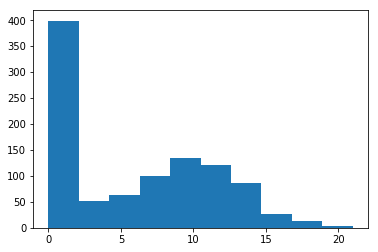

In [8]:
y, SS0 = simul_poisson(P0, theta0, size = 1000) # Simulate 1000 samples of poisson mixtures
plt.hist(y)

In [9]:
Y = y
Theta = {"_lambda" : np.array([5,5])} # Initial lambdas, any !
S = np.random.choice(2, len(Y)) # Initial S, random !
P = np.array([[0.5,0.5],[0.5,0.5]]) # Initial P, any !

In [10]:
phmm = HMM(tDictDist, sDist, pDist, Y=Y, S = S, Theta = Theta, P = P )

In [11]:
phmm.run(200) # Start the gibbs sampler n-times

# Can we recover the true clusters ? Let's see !

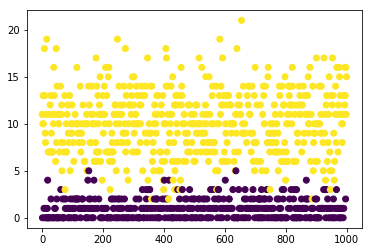

In [12]:
plt.scatter(np.arange(len(Y)), Y, c= phmm.S)

In [13]:
(phmm.S == SS0).mean() # Precision or Error rate

0.976

In [14]:
phmm.Theta

{'_lambda': array([ 0.99806218, 10.05848356])}

In [15]:
_lambda = phmm.tDictDist["_lambda"]
_lambda.params, _lambda.default

({'a': array([ 435. , 5723.5]), 'scale': array([0.00229885, 0.00176056])},
 {'a0': 1, 'scale0': 1, 'a': array([1. , 0.5]), 'scale': array([0.5, 1. ])})

In [16]:
_lambda.rvs().round(2) # Our estimates are quite good !!!

array([ 1.05, 10.09])

In [17]:
np.array([history["_lambda"] for history in phmm.H["Theta"][-50::]]).mean(0) # Mean predicted value for _lambda

array([ 1.00481087, 10.10393649])

In [18]:
np.array(phmm.H["P"][-30::]).mean(0) # Mean transition matrix

array([[0.23065989, 0.76934011],
       [0.58963631, 0.41036369]])